# Laboratorio di simulazione numerica

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
import numpy as np
import math
import string

colors = ["firebrick", "limegreen", "royalblue", "darkorange"]

#### Exercise 04.2

Input parameters (in reduced units):

| Quantity | Value |
| --- | --- |
| Interaction energy | 1 |
| External magnetic field | 0.02|
| Number of sites | 50 |
| Total simulation steps | 504000 |
| Number of blocks | 200 |
| Equilibration steps | 4000 |

In [2]:
# Common parameters
temperature_list = np.linspace(0.4, 2.6, num=100)
J                = 1.0
h                = 0.02
n_spins          = 50

beta             = 1 / temperature_list
th               = np.tanh(beta * J)
thN              = th**n_spins

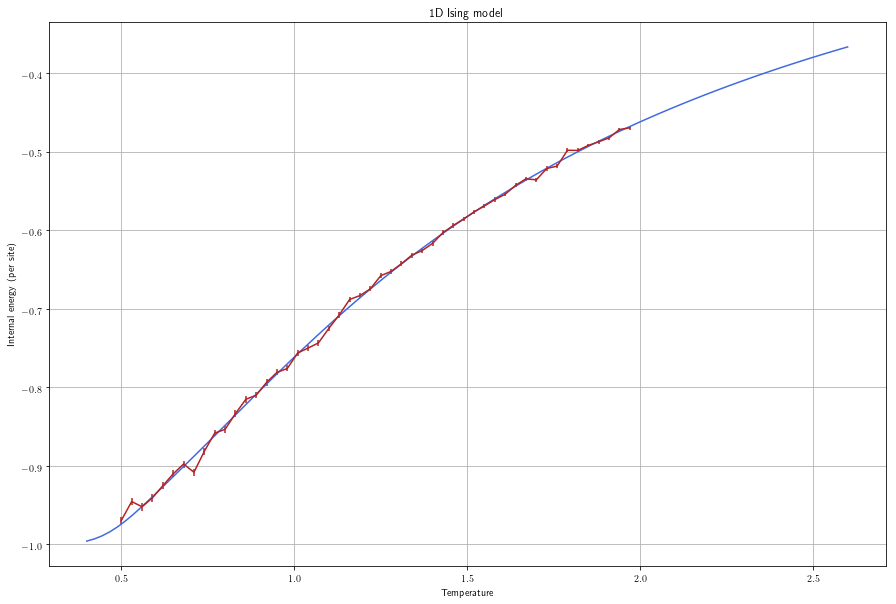

In [3]:
temperature, u_avg, u_err = np.loadtxt("internal_energy.dat", unpack = True)
ch = 1/th
exp_energy = -J * (th + ch * thN) / (1 + thN)

plt.figure(1, figsize = (15,10))
plt.plot(temperature_list, exp_energy, color = "royalblue")
plt.errorbar(temperature, u_avg / n_spins, yerr = u_err / n_spins, color = "firebrick")
# Since the simulations outputs the total internal energy, I divide it here by the number
# of spins in order to be able to compare it to the expected curve. The same holds for
# the other three quantities plotted below.
plt.title('1D Ising model')
plt.xlabel('Temperature')
plt.ylabel('Internal energy (per site)')
plt.grid(True)
plt.show()

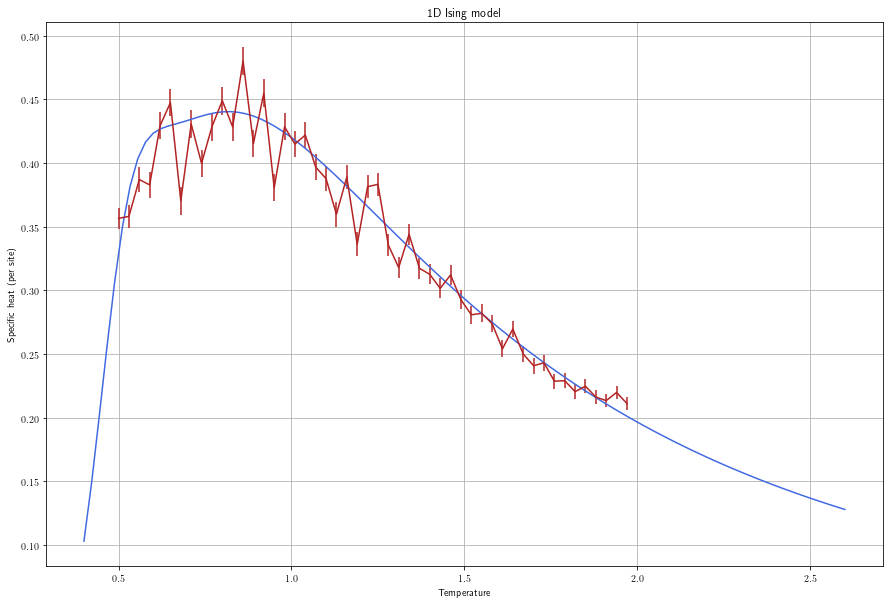

In [4]:
temperature, c_avg, c_err = np.loadtxt("specific_heat.dat", unpack = True)
exp_specific_heat = ((beta * J)**2) * (
        ((1 + thN + (n_spins - 1) * (th**2) + (n_spins - 1) * (ch**2) * thN) / (1 + thN)) -
        n_spins *((th + ch * thN) / (1 + thN))**2
)

plt.figure(1, figsize = (15,10))
plt.plot(temperature_list, exp_specific_heat, color = "royalblue")
plt.errorbar(temperature, c_avg / n_spins, yerr = c_err / n_spins, color = "firebrick")
plt.title('1D Ising model')
plt.xlabel('Temperature')
plt.ylabel('Specific heat (per site)')
plt.grid(True)
plt.show()

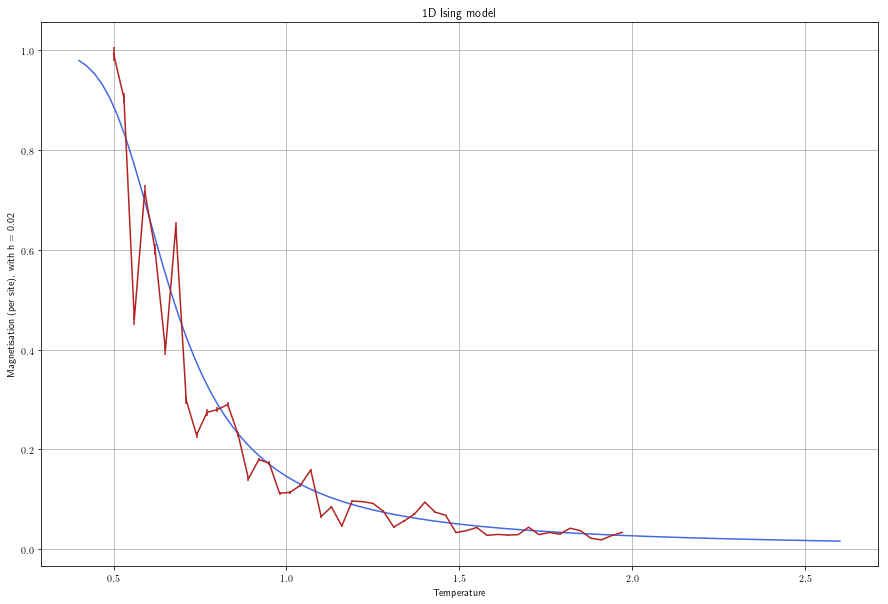

In [5]:
temperature, m_avg, m_err = np.loadtxt("magnetisation.dat", unpack = True)
l1 = (np.exp(beta * J) * np.cosh(beta * h) +
    np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) - 2 * np.sinh(2 * beta * J)))
l2 = (np.exp(beta * J) * np.cosh(beta * h) -
    np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) - 2 * np.sinh(2 * beta * J)))
Z = l1**n_spins + l2**n_spins
exp_magnetisation = 1 / Z * (np.exp(beta * J) * np.sinh(beta * h) * (
        (l1**(n_spins-1)) *
        (1 + np.exp(beta * J) * np.cosh(beta * h) / np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) -
            2 * np.sinh(2 * beta * J))) +
        (l2**(n_spins - 1)) *
        (1 - np.exp(beta * J) * np.cosh(beta * h) / np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) -
            2 * np.sinh(2 * beta * J)))
        )
    )

plt.figure(1, figsize = (15,10))
plt.plot(temperature_list, exp_magnetisation, color = "royalblue")
plt.errorbar(temperature, m_avg / n_spins, yerr = m_err / n_spins, color = "firebrick")
plt.title('1D Ising model')
plt.xlabel('Temperature')
plt.ylabel('Magnetisation (per site), with h = 0.02')
plt.grid(True)
plt.show()

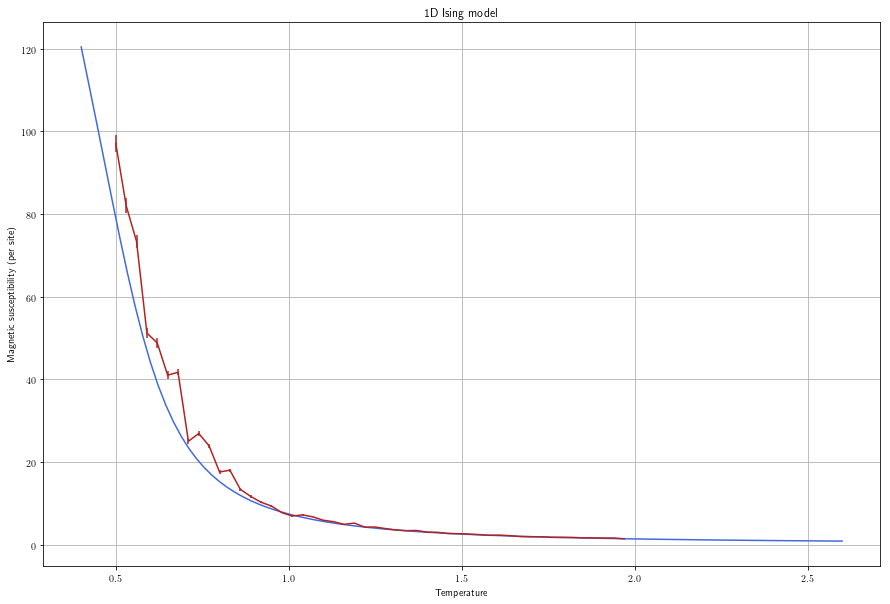

In [6]:
exp_mag_susceptibility = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)
temperature, x_avg, x_err = np.loadtxt("magnetic_susceptibility.dat", unpack = True)

plt.figure(1, figsize = (15,10))
plt.plot(temperature_list, exp_mag_susceptibility, color = "royalblue")
plt.errorbar(temperature, x_avg / n_spins, yerr = x_err / n_spins, color = "firebrick")
plt.title('1D Ising model')
plt.xlabel('Temperature')
plt.ylabel('Magnetic susceptibility (per site)')
plt.grid(True)
plt.show()